In [1]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make("FrozenLake-v0")

In [3]:
sess = tf.InteractiveSession()

In [4]:
inputs = tf.placeholder(tf.float32, [1,16])

out = tf.matmul(inputs, tf.Variable(tf.random_uniform([16,4],0,0.01)))

pred = tf.argmax(out, 1)

nextQ = tf.placeholder(tf.float32, [1, 4])
loss = tf.reduce_sum(tf.square(nextQ - out))

opt = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

In [5]:
tf.global_variables_initializer().run()

In [9]:
# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []

for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Network
    while j < 99:
        j+=1
        #Choose an action by greedily (with e chance of random action) from the Q-network
        a,allQ = sess.run([pred,out],feed_dict={inputs:np.identity(16)[s:s+1]})
        if np.random.rand(1) < e:
            a[0] = env.action_space.sample()
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a[0])
        #Obtain the Q' values by feeding the new state through our network
        Q1 = sess.run(out,feed_dict={inputs:np.identity(16)[s1:s1+1]})
        #Obtain maxQ' and set our target value for chosen action.
        maxQ1 = np.max(Q1)
        targetQ = allQ
        targetQ[0,a[0]] = r + y*maxQ1
        #Train our network using target and predicted Q values

        sess.run([opt], feed_dict={inputs:np.identity(16)[s:s+1],nextQ:targetQ})
        rAll += r
        s = s1
        if d == True:
            #Reduce chance of random action as we train the model.
            e = 1./((i/50) + 10)
            break
    jList.append(j)
    rList.append(rAll)
        
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")


Percent of succesful episodes: 0.526%


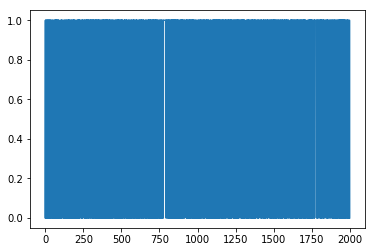

In [10]:
plt.plot(rList)

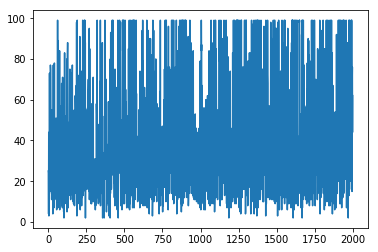

In [11]:
plt.plot(jList)